# **Tracking Manipulation**

## **1.0: Package and Data Load**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [223]:
tw1 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_1.csv')
tw2 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_2.csv')
tw3 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_3.csv')
tw4 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_4.csv')
tw5 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_5.csv')
tw6 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_6.csv')
tw7 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_7.csv')
tw8 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_8.csv')
tw9 = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tracking_week_9.csv')

In [224]:
tackles = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/tackles.csv')
games = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/games.csv')
players = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/players.csv')
plays = pd.read_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/plays.csv')

In [225]:
pd.set_option('display.max_columns', None)
tw1.head(10)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught
6,2022090800,56,35472.0,Rodger Saffold,7,2022-09-08 20:24:05.799999,76.0,BUF,left,88.87,26.64,0.93,1.69,0.09,235.77,134.32,NaN
7,2022090800,56,35472.0,Rodger Saffold,8,2022-09-08 20:24:05.900000,76.0,BUF,left,88.91,26.59,0.68,1.74,0.07,240.00,131.01,NaN
8,2022090800,56,35472.0,Rodger Saffold,9,2022-09-08 20:24:06.000000,76.0,BUF,left,88.94,26.57,0.42,1.74,0.04,243.56,122.29,NaN
9,2022090800,56,35472.0,Rodger Saffold,10,2022-09-08 20:24:06.099999,76.0,BUF,left,88.95,26.58,0.14,1.83,0.01,246.07,85.87,NaN


In [105]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


## **2.0: Data Wrangling**

### **2.1: Merging GameId and PlayId**

In [226]:
#Function to create 'game_play_Id' column in DF
def game_play_Id(df):
    df['game_play_Id'] = df['gameId'].astype('str') + '_' + df['playId'].astype('str')

    return df

In [227]:
game_play_Id(tw1)
game_play_Id(tw2)
game_play_Id(tw3)
game_play_Id(tw4)
game_play_Id(tw5)
game_play_Id(tw6)
game_play_Id(tw7)
game_play_Id(tw8)
game_play_Id(tw9)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id
0,2022110300,55,38542.0,Fletcher Cox,1,2022-11-03 20:16:30.400000,91.0,PHI,right,35.310000,21.250000,0.25,0.21,0.01,275.05,263.18,NaN,2022110300_55
1,2022110300,55,38542.0,Fletcher Cox,2,2022-11-03 20:16:30.500000,91.0,PHI,right,35.300000,21.250000,0.21,0.20,0.02,270.08,264.09,NaN,2022110300_55
2,2022110300,55,38542.0,Fletcher Cox,3,2022-11-03 20:16:30.599999,91.0,PHI,right,35.290000,21.250000,0.17,0.18,0.01,267.61,264.78,NaN,2022110300_55
3,2022110300,55,38542.0,Fletcher Cox,4,2022-11-03 20:16:30.700000,91.0,PHI,right,35.310000,21.240000,0.10,0.15,0.02,263.43,250.80,NaN,2022110300_55
4,2022110300,55,38542.0,Fletcher Cox,5,2022-11-03 20:16:30.799999,91.0,PHI,right,35.310000,21.250000,0.07,0.12,0.01,262.28,258.57,NaN,2022110300_55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,2022110700_3787
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,2022110700_3787
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,2022110700_3787
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,2022110700_3787


In [229]:
plays = game_play_Id(plays)
tackles = game_play_Id(tackles)


,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id
0,2022090800,101,42816,1,0,0,0,2022090800_101
1,2022090800,393,46232,1,0,0,0,2022090800_393
2,2022090800,486,40166,1,0,0,0,2022090800_486
3,2022090800,646,47939,1,0,0,0,2022090800_646
4,2022090800,818,40107,1,0,0,0,2022090800_818
...,...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1,2022091113_2494
17422,2022092502,3510,42406,0,0,0,1,2022092502_3510
17423,2022091113,3642,43478,0,0,0,1,2022091113_3642
17424,2022091901,3578,42431,0,0,0,1,2022091901_3578


In [248]:
tackles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gameId            17426 non-null  int64 
 1   playId            17426 non-null  int64 
 2   nflId             17426 non-null  int64 
 3   tackle            17426 non-null  int64 
 4   assist            17426 non-null  int64 
 5   forcedFumble      17426 non-null  int64 
 6   pff_missedTackle  17426 non-null  int64 
 7   game_play_Id      17426 non-null  object
dtypes: int64(7), object(1)
memory usage: 1.1+ MB


### **2.2: Adding Defensive Team to Tracking Data and Dropping all observations for Offensive Team**

In [230]:
#Function to add defensive team to Tracking Data CSVs
def add_def_team(df1, df2):
    df1 = pd.merge(df1, df2[['game_play_Id', 'defensiveTeam']], on='game_play_Id', how='left')
    return df1
    

In [231]:
tw1 = add_def_team(tw1, plays)
tw2 = add_def_team(tw2, plays)
tw3 = add_def_team(tw3, plays)
tw4 = add_def_team(tw4, plays)
tw5 = add_def_team(tw5, plays)
tw6 = add_def_team(tw6, plays)
tw7 = add_def_team(tw7, plays)
tw8 = add_def_team(tw8, plays)
tw9 = add_def_team(tw9, plays)



In [232]:
tw1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,2022090800_56,LA
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,2022090800_56,LA
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,2022090800_56,LA
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,2022090800_56,LA
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,2022090800_56,LA


**Merging ballCarrierId to each play based upon game_play_Id from tracking data**

In [233]:
def merge_ballCarrierId(df1, df2):
    df1 = pd.merge(df1, df2[['game_play_Id', 'ballCarrierId']], on='game_play_Id', how='left')
    return df1

In [234]:
tw1 = merge_ballCarrierId(tw1, plays)
tw2 = merge_ballCarrierId(tw2, plays)
tw3 = merge_ballCarrierId(tw3, plays)
tw4 = merge_ballCarrierId(tw4, plays)
tw5 = merge_ballCarrierId(tw5, plays)
tw6 = merge_ballCarrierId(tw6, plays)
tw7 = merge_ballCarrierId(tw7, plays)
tw8 = merge_ballCarrierId(tw8, plays)
tw9 = merge_ballCarrierId(tw9, plays)


In [235]:
tw1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,ballCarrierId
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,2022090800_56,LA,42489
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,2022090800_56,LA,42489
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,2022090800_56,LA,42489
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,2022090800_56,LA,42489
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,2022090800_56,LA,42489


**Dropping all observations from Tracking Data where the 'Club' does not equal 'defensiveTeam' and 'nflId' does not equal ball_carrierId**

In [236]:
###Drops all offensive players except ball carrier and defensive players
def drop_offensive(df):
    df = df[(df['club'] == df['defensiveTeam']) | (df['nflId'] == df['ballCarrierId'])]
    return df


In [237]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407439 entries, 0 to 1407438
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1407439 non-null  int64  
 1   playId         1407439 non-null  int64  
 2   nflId          1346246 non-null  float64
 3   displayName    1407439 non-null  object 
 4   frameId        1407439 non-null  int64  
 5   time           1407439 non-null  object 
 6   jerseyNumber   1346246 non-null  float64
 7   club           1407439 non-null  object 
 8   playDirection  1407439 non-null  object 
 9   x              1407439 non-null  float64
 10  y              1407439 non-null  float64
 11  s              1407439 non-null  float64
 12  a              1407439 non-null  float64
 13  dis            1407439 non-null  float64
 14  o              1346397 non-null  float64
 15  dir            1346397 non-null  float64
 16  event          130268 non-null   object 
 17  game_pla

In [238]:
tw1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,ballCarrierId
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,2022090800_56,LA,42489
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,2022090800_56,LA,42489
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,2022090800_56,LA,42489
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,2022090800_56,LA,42489
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,2022090800_56,LA,42489


In [239]:
tw1 = drop_offensive(tw1)
tw2 = drop_offensive(tw2)
tw3 = drop_offensive(tw3)
tw4 = drop_offensive(tw4)
tw5 = drop_offensive(tw5)
tw6 = drop_offensive(tw6)
tw7 = drop_offensive(tw7)
tw8 = drop_offensive(tw8)
tw9 = drop_offensive(tw9)

In [240]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734316 entries, 22 to 1407385
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameId         734316 non-null  int64  
 1   playId         734316 non-null  int64  
 2   nflId          734316 non-null  float64
 3   displayName    734316 non-null  object 
 4   frameId        734316 non-null  int64  
 5   time           734316 non-null  object 
 6   jerseyNumber   734316 non-null  float64
 7   club           734316 non-null  object 
 8   playDirection  734316 non-null  object 
 9   x              734316 non-null  float64
 10  y              734316 non-null  float64
 11  s              734316 non-null  float64
 12  a              734316 non-null  float64
 13  dis            734316 non-null  float64
 14  o              734316 non-null  float64
 15  dir            734316 non-null  float64
 16  event          67956 non-null   object 
 17  game_play_Id   734316 non-null  

In [241]:
tw1.head(50)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,ballCarrierId
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,2022090800_56,LA,42489
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,78.20,27.69,1.78,4.43,0.16,357.21,346.31,pass_arrived,2022090800_56,LA,42489
24,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,78.16,27.88,2.21,4.20,0.20,356.04,352.83,NaN,2022090800_56,LA,42489
25,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,78.14,28.13,2.70,3.87,0.25,355.34,356.38,NaN,2022090800_56,LA,42489
26,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,78.12,28.42,3.05,3.19,0.29,350.87,357.25,NaN,2022090800_56,LA,42489
27,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught,2022090800_56,LA,42489
28,2022090800,56,38577.0,Bobby Wagner,7,2022-09-08 20:24:05.799999,45.0,LA,left,78.10,29.08,3.52,1.83,0.34,345.22,359.37,NaN,2022090800_56,LA,42489
29,2022090800,56,38577.0,Bobby Wagner,8,2022-09-08 20:24:05.900000,45.0,LA,left,78.10,29.44,3.65,1.16,0.36,342.21,0.37,NaN,2022090800_56,LA,42489
30,2022090800,56,38577.0,Bobby Wagner,9,2022-09-08 20:24:06.000000,45.0,LA,left,78.11,29.80,3.65,0.61,0.36,343.38,1.93,NaN,2022090800_56,LA,42489
31,2022090800,56,38577.0,Bobby Wagner,10,2022-09-08 20:24:06.099999,45.0,LA,left,78.12,30.16,3.64,0.46,0.36,344.37,2.34,NaN,2022090800_56,LA,42489


### **2.3: Saving X and Y position of ball carrier and Speed, Acceleration, Distance Traveled, Orientation, and Direction on all moments of a play**

In [242]:
def add_ball_carrier_coordinates(df):
    ball_carrier_df = df[df['nflId'] == df['ballCarrierId']][['game_play_Id', 'frameId', 'x', 'y', 's', 'a', 'dis', 'o', 'dir']]
    ball_carrier_df.rename(columns={'x': 'bcx', 'y': 'bcy', 's': 'bc_s', 'a': 'bc_a', 'dis': 'bc_dis', 'o': 'bc_o', 'dir': 'bc_dir'}, inplace=True)
    df = pd.merge(df, ball_carrier_df, on=['game_play_Id', 'frameId'], how='left')
    return df

In [243]:
tw1 = add_ball_carrier_coordinates(tw1)
tw2 = add_ball_carrier_coordinates(tw2)
tw3 = add_ball_carrier_coordinates(tw3)
tw4 = add_ball_carrier_coordinates(tw4)
tw5 = add_ball_carrier_coordinates(tw5)
tw6 = add_ball_carrier_coordinates(tw6)
tw7 = add_ball_carrier_coordinates(tw7)
tw8 = add_ball_carrier_coordinates(tw8)
tw9 = add_ball_carrier_coordinates(tw9)

In [244]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734316 entries, 0 to 734315
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameId         734316 non-null  int64  
 1   playId         734316 non-null  int64  
 2   nflId          734316 non-null  float64
 3   displayName    734316 non-null  object 
 4   frameId        734316 non-null  int64  
 5   time           734316 non-null  object 
 6   jerseyNumber   734316 non-null  float64
 7   club           734316 non-null  object 
 8   playDirection  734316 non-null  object 
 9   x              734316 non-null  float64
 10  y              734316 non-null  float64
 11  s              734316 non-null  float64
 12  a              734316 non-null  float64
 13  dis            734316 non-null  float64
 14  o              734316 non-null  float64
 15  dir            734316 non-null  float64
 16  event          67956 non-null   object 
 17  game_play_Id   734316 non-nul

### **2.4: Finding distance between Defender and Ball Carrier**

In [245]:
###Calculates euclidean distance from ball carrier
def add_distance_from_bc(df):
    df['distance_from_bc'] = np.sqrt((df['x'] - df['bcx'])**2 + (df['y'] - df['bcy'])**2)
    return df

In [246]:
tw1 = add_distance_from_bc(tw1)
tw2 = add_distance_from_bc(tw2)
tw3 = add_distance_from_bc(tw3)
tw4 = add_distance_from_bc(tw4)
tw5 = add_distance_from_bc(tw5)
tw6 = add_distance_from_bc(tw6)
tw7 = add_distance_from_bc(tw7)
tw8 = add_distance_from_bc(tw8)
tw9 = add_distance_from_bc(tw9)

### **2.5: Saving only tracking data for players who had tackle, assist, or missed tackle on play**

In [137]:
tackles = game_play_Id(tackles)

In [138]:
tackles.pff_missedTackle.value_counts()

pff_missedTackle
0    15336
1     2090
Name: count, dtype: int64

In [139]:
tackle_plays = tackles.groupby('game_play_Id').sum()

In [48]:
tackle_plays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12025 entries, 2022090800_101 to 2022110700_971
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            12025 non-null  int64
 1   playId            12025 non-null  int64
 2   nflId             12025 non-null  int64
 3   tackle            12025 non-null  int64
 4   assist            12025 non-null  int64
 5   forcedFumble      12025 non-null  int64
 6   pff_missedTackle  12025 non-null  int64
dtypes: int64(7)
memory usage: 1009.6+ KB


In [140]:
tackle_plays.pff_missedTackle.value_counts()

pff_missedTackle
0    10248
1     1509
2      232
3       30
4        4
6        1
5        1
Name: count, dtype: int64

In [141]:
tackle_plays.assist.value_counts()

assist
0    8535
2    2004
1    1486
Name: count, dtype: int64

In [142]:
tackle_plays.tackle.value_counts()

tackle
1    9917
0    2107
2       1
Name: count, dtype: int64

In [143]:
tackle_plays.loc[tackle_plays['tackle'] == 2]

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
game_play_Id,,,,,,,
2022091107_1879,6066273321,5637,143027,2,1,1,0


In [144]:
tackles.loc[tackles['game_play_Id'] == '2022091107_1879']

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,game_play_Id
86,2022091107,1879,44854,1,0,0,0,2022091107_1879
302,2022091107,1879,54479,1,0,0,0,2022091107_1879
11500,2022091107,1879,43694,0,1,1,0,2022091107_1879


In [51]:
plays = game_play_Id(plays)

In [52]:
plays.loc[plays['game_play_Id'] == '2022091107_1879']

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_play_Id
4005,2022091107,1879,46226,Tyler Conklin,(1:16) (Shotgun) J.Flacco pass short right to ...,2,3,5,NYJ,BAL,BAL,27,1:16,0,10,C,6.0,NaN,0,0,N,83,SHOTGUN,5.0,0.95837,0.19847,0.80153,-0.009912,0.009912,1.877971,-0.117812,NaN,NaN,NaN,NaN,2022091107_1879


In [53]:
tw1.loc[tw1['game_play_Id'] == '2022091107_1879']

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam
783751,2022091107,1879,33131.0,Calais Campbell,1,2022-09-11 14:27:19.900000,93.0,BAL,right,87.45,31.91,2.91,1.92,0.32,188.54,135.71,NaN,2022091107_1879,BAL
783752,2022091107,1879,33131.0,Calais Campbell,2,2022-09-11 14:27:20.000000,93.0,BAL,right,87.69,31.64,3.22,1.53,0.36,179.64,139.07,NaN,2022091107_1879,BAL
783753,2022091107,1879,33131.0,Calais Campbell,3,2022-09-11 14:27:20.099999,93.0,BAL,right,87.90,31.35,3.37,1.49,0.36,180.97,143.05,NaN,2022091107_1879,BAL
783754,2022091107,1879,33131.0,Calais Campbell,4,2022-09-11 14:27:20.200000,93.0,BAL,right,88.11,31.03,3.59,1.33,0.38,198.46,146.44,pass_arrived,2022091107_1879,BAL
783755,2022091107,1879,33131.0,Calais Campbell,5,2022-09-11 14:27:20.299999,93.0,BAL,right,88.31,30.69,3.82,1.51,0.40,193.65,149.77,NaN,2022091107_1879,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784266,2022091107,1879,54479.0,Kyle Hamilton,22,2022-09-11 14:27:22.000000,14.0,BAL,right,91.76,12.83,4.69,1.02,0.47,245.45,223.51,fumble,2022091107_1879,BAL
784267,2022091107,1879,54479.0,Kyle Hamilton,23,2022-09-11 14:27:22.099999,14.0,BAL,right,91.45,12.48,4.63,1.92,0.47,245.45,220.55,NaN,2022091107_1879,BAL
784268,2022091107,1879,54479.0,Kyle Hamilton,24,2022-09-11 14:27:22.200000,14.0,BAL,right,91.18,12.11,4.46,2.92,0.45,253.50,214.54,NaN,2022091107_1879,BAL
784269,2022091107,1879,54479.0,Kyle Hamilton,25,2022-09-11 14:27:22.299999,14.0,BAL,right,90.95,11.74,4.34,3.17,0.44,256.36,209.89,NaN,2022091107_1879,BAL


In [249]:
###NOT USING ANYMORE (DELETE LATER)
'''
def merge_tacklers(df1, df2):
    # Filtering df2 for rows where 'tackles' == 1
    tackles_df = df2[df2['tackle'] == 1]

    # Grouping by 'game_play_Id' and getting the first two 'nflId's
    grouped = tackles_df.groupby('game_play_Id')['nflId'].apply(list).reset_index()

    # Ensure 'nflId' is a list of at least two elements
    grouped['nflId'] = grouped['nflId'].apply(lambda x: x + [None, None] if len(x) == 1 else x)

    # Creating two separate columns for 'tackler_one' and 'tackler_two'
    grouped['tackler_one'] = grouped['nflId'].apply(lambda x: x[0])
    grouped['tackler_two'] = grouped['nflId'].apply(lambda x: x[1] if len(x) > 1 else None)

    # Drop the original 'nflId' list column
    grouped.drop('nflId', axis=1, inplace=True)

    # Merging the grouped data with df1
    df1 = pd.merge(df1, grouped, on='game_play_Id', how='left')

    return df1
'''

In [59]:
tw1_new = merge_tacklers(tw1, tackles)

In [61]:
tw1_new.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,tackler_one,tackler_two
0,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,2022090800_56,LA,43294.0,NaN
1,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,78.20,27.69,1.78,4.43,0.16,357.21,346.31,pass_arrived,2022090800_56,LA,43294.0,NaN
2,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,78.16,27.88,2.21,4.20,0.20,356.04,352.83,NaN,2022090800_56,LA,43294.0,NaN
3,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,78.14,28.13,2.70,3.87,0.25,355.34,356.38,NaN,2022090800_56,LA,43294.0,NaN
4,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,78.12,28.42,3.05,3.19,0.29,350.87,357.25,NaN,2022090800_56,LA,43294.0,NaN


In [64]:
tw1_new.tackler_two.value_counts()

tackler_two
54479.0    286
Name: count, dtype: int64

In [250]:
###Function to merge tacklers and assisters
def merge_tacklers_and_assisters(df1, df2):
    # Function to process and merge based on a given column ('tackles' or 'assists')
    def process_and_merge(df1, df2, column, new_col1, new_col2):
        # Filtering df2 for rows where the specified column == 1
        filtered_df = df2[df2[column] == 1]

        # Grouping by 'game_play_Id' and getting the first two 'nflId's
        grouped = filtered_df.groupby('game_play_Id')['nflId'].apply(list).reset_index()

        # Ensure 'nflId' is a list of at least two elements
        grouped['nflId'] = grouped['nflId'].apply(lambda x: x + [None, None] if len(x) == 1 else x)

        # Creating two separate columns for the specified new column names
        grouped[new_col1] = grouped['nflId'].apply(lambda x: x[0] if x[0] is not None else pd.NA).astype('Int64')
        grouped[new_col2] = grouped['nflId'].apply(lambda x: x[1] if len(x) > 1 and x[1] is not None else pd.NA).astype('Int64')

        # Drop the original 'nflId' list column
        grouped.drop('nflId', axis=1, inplace=True)

        # Merging the grouped data with df1
        return pd.merge(df1, grouped, on='game_play_Id', how='left')

    # Merge tackles
    df1 = process_and_merge(df1, df2, 'tackle', 'tackler_one', 'tackler_two')

    # Merge assists
    df1 = process_and_merge(df1, df2, 'assist', 'assister_one', 'assister_two')

    return df1

In [251]:
###Function to merge missed tacklers
def merge_missed_tacklers(df1, df2):
    # Filtering df2 for rows where 'pff_missedTackle' == 1
    missed_tackles_df = df2[df2['pff_missedTackle'] == 1]

    # Grouping by 'game_play_Id' and getting the first seven 'nflId's
    grouped = missed_tackles_df.groupby('game_play_Id')['nflId'].apply(list).reset_index()

    # Ensuring each list has up to x elements, filling with None if necessary
    max_tacklers = 6 #Edit depending on play with most missed tackles in dataset
    grouped['nflId'] = grouped['nflId'].apply(lambda x: x + [None] * (max_tacklers - len(x)))

    # Creating separate columns for each missed tackler
    for i in range(max_tacklers):
        col_name = f'missed_tackler_{i + 1}'
        grouped[col_name] = grouped['nflId'].apply(lambda x: x[i] if x[i] is not None else pd.NA).astype('Int64')

    # Dropping the original 'nflId' list column
    grouped.drop('nflId', axis=1, inplace=True)

    # Merging the grouped data with df1
    df1 = pd.merge(df1, grouped, on='game_play_Id', how='left')

    return df1

In [252]:
tw1 = merge_tacklers_and_assisters(tw1, tackles)
tw1 = merge_missed_tacklers(tw1, tackles)

tw2 = merge_tacklers_and_assisters(tw2, tackles)
tw2 = merge_missed_tacklers(tw2, tackles)

tw3 = merge_tacklers_and_assisters(tw3, tackles)
tw3 = merge_missed_tacklers(tw3, tackles)

tw4 = merge_tacklers_and_assisters(tw4, tackles)    
tw4 = merge_missed_tacklers(tw4, tackles)

tw5 = merge_tacklers_and_assisters(tw5, tackles)
tw5 = merge_missed_tacklers(tw5, tackles)

tw6 = merge_tacklers_and_assisters(tw6, tackles)
tw6 = merge_missed_tacklers(tw6, tackles)

tw7 = merge_tacklers_and_assisters(tw7, tackles)
tw7 = merge_missed_tacklers(tw7, tackles)

tw8 = merge_tacklers_and_assisters(tw8, tackles)
tw8 = merge_missed_tacklers(tw8, tackles)

tw9 = merge_tacklers_and_assisters(tw9, tackles)
tw9 = merge_missed_tacklers(tw9, tackles)


In [253]:
tw9.head(10)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,ballCarrierId,bcx,bcy,bc_s,bc_a,bc_dis,bc_o,bc_dir,distance_from_bc,tackler_one,tackler_two,assister_one,assister_two,missed_tackler_1,missed_tackler_2,missed_tackler_3,missed_tackler_4,missed_tackler_5,missed_tackler_6
0,2022110300,55,38542.0,Fletcher Cox,1,2022-11-03 20:16:30.400000,91.0,PHI,right,35.31,21.25,0.25,0.21,0.01,275.05,263.18,NaN,2022110300_55,PHI,54572,29.67,21.53,0.01,0.01,0.00,86.45,161.68,5.646946,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2022110300,55,38542.0,Fletcher Cox,2,2022-11-03 20:16:30.500000,91.0,PHI,right,35.30,21.25,0.21,0.20,0.02,270.08,264.09,NaN,2022110300_55,PHI,54572,29.67,21.55,0.00,0.00,0.01,86.45,133.94,5.637987,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2022110300,55,38542.0,Fletcher Cox,3,2022-11-03 20:16:30.599999,91.0,PHI,right,35.29,21.25,0.17,0.18,0.01,267.61,264.78,NaN,2022110300_55,PHI,54572,29.68,21.56,0.00,0.00,0.01,86.45,98.95,5.618559,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2022110300,55,38542.0,Fletcher Cox,4,2022-11-03 20:16:30.700000,91.0,PHI,right,35.31,21.24,0.10,0.15,0.02,263.43,250.80,NaN,2022110300_55,PHI,54572,29.68,21.56,0.00,0.00,0.00,86.45,99.07,5.639087,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2022110300,55,38542.0,Fletcher Cox,5,2022-11-03 20:16:30.799999,91.0,PHI,right,35.31,21.25,0.07,0.12,0.01,262.28,258.57,NaN,2022110300_55,PHI,54572,29.68,21.55,0.00,0.00,0.01,86.45,102.81,5.637987,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,2022110300,55,38542.0,Fletcher Cox,6,2022-11-03 20:16:30.900000,91.0,PHI,right,35.30,21.25,0.06,0.10,0.01,261.24,267.94,ball_snap,2022110300_55,PHI,54572,29.69,21.56,0.00,0.00,0.00,86.45,94.45,5.618559,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,2022110300,55,38542.0,Fletcher Cox,7,2022-11-03 20:16:31.000000,91.0,PHI,right,35.29,21.29,0.08,0.24,0.04,253.24,314.35,NaN,2022110300_55,PHI,54572,29.69,21.56,0.00,0.00,0.01,86.45,76.73,5.606505,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,2022110300,55,38542.0,Fletcher Cox,8,2022-11-03 20:16:31.099999,91.0,PHI,right,35.26,21.31,0.15,0.54,0.03,260.49,327.79,NaN,2022110300_55,PHI,54572,29.69,21.57,0.00,0.00,0.00,87.09,69.11,5.576065,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,2022110300,55,38542.0,Fletcher Cox,9,2022-11-03 20:16:31.200000,91.0,PHI,right,35.25,21.35,0.31,1.06,0.04,262.92,332.89,NaN,2022110300_55,PHI,54572,29.69,21.59,0.00,0.01,0.02,87.09,41.58,5.565177,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,2022110300,55,38542.0,Fletcher Cox,10,2022-11-03 20:16:31.299999,91.0,PHI,right,35.23,21.39,0.51,1.44,0.05,262.92,335.73,NaN,2022110300_55,PHI,54572,29.70,21.62,0.04,0.96,0.04,83.25,15.75,5.534781,47888,<NA>,39984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


### **2.6: Keeping only points where the player involved is a tackler, assister, missed a tackle, or is the ball carrier**

In [254]:
###Function that saves observations where player is in on tackle, missed tackle, or is a ball carrier
def filter_relevant_rows(df):
    df = df[(df['nflId'] == df['tackler_one']) | 
            (df['nflId'] == df['tackler_two']) | 
            (df['nflId'] == df['assister_one']) | 
            (df['nflId'] == df['assister_two']) | 
            (df['nflId'] == df['missed_tackler_1']) | 
            (df['nflId'] == df['missed_tackler_2']) | 
            (df['nflId'] == df['missed_tackler_3']) | 
            (df['nflId'] == df['missed_tackler_4']) | 
            (df['nflId'] == df['missed_tackler_5']) | 
            (df['nflId'] == df['missed_tackler_6']) | 
            (df['nflId'] == df['ballCarrierId'])]
    return df

In [255]:
tw1 = filter_relevant_rows(tw1)
tw2 = filter_relevant_rows(tw2)
tw3 = filter_relevant_rows(tw3)
tw4 = filter_relevant_rows(tw4)
tw5 = filter_relevant_rows(tw5)
tw6 = filter_relevant_rows(tw6)
tw7 = filter_relevant_rows(tw7)
tw8 = filter_relevant_rows(tw8)
tw9 = filter_relevant_rows(tw9)

In [256]:
tw5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160320 entries, 0 to 770207
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gameId            160320 non-null  int64  
 1   playId            160320 non-null  int64  
 2   nflId             160320 non-null  float64
 3   displayName       160320 non-null  object 
 4   frameId           160320 non-null  int64  
 5   time              160320 non-null  object 
 6   jerseyNumber      160320 non-null  float64
 7   club              160320 non-null  object 
 8   playDirection     160320 non-null  object 
 9   x                 160320 non-null  float64
 10  y                 160320 non-null  float64
 11  s                 160320 non-null  float64
 12  a                 160320 non-null  float64
 13  dis               160320 non-null  float64
 14  o                 160320 non-null  float64
 15  dir               160320 non-null  float64
 16  event             13703 n

### **2.7: Adding missed tackle events**

In [257]:

def add_missed_tackle_events(df):
    # Create a new column 'new_event' with NaN values
    df['new_event'] = np.nan

    # Get the missed tackler columns
    missed_tackler_cols = [col for col in df.columns if 'missed_tackler_' in col]

    # Initialize variables
    current_nflId = None
    current_game_play_Id = None
    min_distance_row = None

    for idx, row in df.iterrows():
        if pd.isna(current_nflId) or row['nflId'] != current_nflId or row['game_play_Id'] != current_game_play_Id:
            # Update 'new_event' for the row with the smallest distance
            if min_distance_row is not None:
                df.loc[min_distance_row, 'new_event'] = 'missed tackle'
                min_distance_row = None

            # Check if the current row's 'nflId' is in the missed tackler columns
            if pd.notna(row['nflId']) and row['nflId'] in row[missed_tackler_cols].dropna().values:
                current_nflId = row['nflId']
                current_game_play_Id = row['game_play_Id']
                min_distance_row = idx
        elif row['distance_from_bc'] < df.loc[min_distance_row, 'distance_from_bc']:
            # Update the row with the smallest distance
            min_distance_row = idx

    # Update 'new_event' for the last group of rows
    if min_distance_row is not None:
        df.loc[min_distance_row, 'new_event'] = 'missed tackle'

    return df

In [258]:
tw1 = add_missed_tackle_events(tw1)
tw2 = add_missed_tackle_events(tw2)
tw3 = add_missed_tackle_events(tw3)
tw4 = add_missed_tackle_events(tw4)
tw5 = add_missed_tackle_events(tw5)
tw6 = add_missed_tackle_events(tw6)
tw7 = add_missed_tackle_events(tw7)
tw8 = add_missed_tackle_events(tw8)
tw9 = add_missed_tackle_events(tw9)

/var/folders/38/1m7d78r13mngspmlwjmj74480000gn/T/ipykernel_80575/1185140977.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'missed tackle' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[min_distance_row, 'new_event'] = 'missed tackle'
/var/folders/38/1m7d78r13mngspmlwjmj74480000gn/T/ipykernel_80575/1185140977.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'missed tackle' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[min_distance_row, 'new_event'] = 'missed tackle'
/var/folders/38/1m7d78r13mngspmlwjmj74480000gn/T/ipykernel_80575/1185140977.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'missed tackle' has dtype incompatible with float64, please explicitly cas

In [259]:
tw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128011 entries, 50 to 599791
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gameId            128011 non-null  int64  
 1   playId            128011 non-null  int64  
 2   nflId             128011 non-null  float64
 3   displayName       128011 non-null  object 
 4   frameId           128011 non-null  int64  
 5   time              128011 non-null  object 
 6   jerseyNumber      128011 non-null  float64
 7   club              128011 non-null  object 
 8   playDirection     128011 non-null  object 
 9   x                 128011 non-null  float64
 10  y                 128011 non-null  float64
 11  s                 128011 non-null  float64
 12  a                 128011 non-null  float64
 13  dis               128011 non-null  float64
 14  o                 128011 non-null  float64
 15  dir               128011 non-null  float64
 16  event             11048 

**Checking to make sure there is the correct number of missed tackles in each week**

In [193]:
tackles = pd.merge(tackles, games[['gameId', 'week']], on='gameId', how='left')

In [203]:
tackles_w1 = tackles[tackles['week'] == 1]
tackles_w2 = tackles[tackles['week'] == 2]
tackles_w3 = tackles[tackles['week'] == 3]
tackles_w4 = tackles[tackles['week'] == 4]
tackles_w5 = tackles[tackles['week'] == 5]
tackles_w6 = tackles[tackles['week'] == 6]
tackles_w7 = tackles[tackles['week'] == 7]
tackles_w8 = tackles[tackles['week'] == 8]
tackles_w9 = tackles[tackles['week'] == 9]

In [220]:
tackles_w9.pff_missedTackle.value_counts()

pff_missedTackle
0    1475
1     211
Name: count, dtype: int64

### **2.8: Computing Relative Velocity between defender and ball carrier at every point**

In [261]:

'''
def calculate_relative_vectors(df):
    # Function to calculate resultant vector for each row
    def resultant_vector(speed1, angle1, speed2, angle2):
        # Convert angles to radians
        angle1_rad = math.radians(90 - angle1)
        angle2_rad = math.radians(90 - angle2)

        # Calculate components of each vector
        x1, y1 = speed1 * math.cos(angle1_rad), speed1 * math.sin(angle1_rad)
        x2, y2 = speed2 * math.cos(angle2_rad), speed2 * math.sin(angle2_rad)

        # Sum the components to get the resultant vector components
        resultant_x = x1 + x2
        resultant_y = y1 + y2

        # Calculate magnitude and angle of the resultant vector
        magnitude = math.sqrt(resultant_x**2 + resultant_y**2)
        angle = math.degrees(math.atan2(resultant_y, resultant_x))
        return magnitude, angle

    # Apply the calculation to each row
    df[['rel_s', 'rel_dir']] = df.apply(lambda row: resultant_vector(row['s'], row['dir'], row['bc_s'], row['bc_dir']), axis=1, result_type='expand')

    return df
    '''

In [262]:
tw1_test = calculate_relative_vectors(tw1)

In [267]:
tw1_test[25:65]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,ballCarrierId,bcx,bcy,bc_s,bc_a,bc_dis,bc_o,bc_dir,distance_from_bc,tackler_one,tackler_two,assister_one,assister_two,missed_tackler_1,missed_tackler_2,missed_tackler_3,missed_tackler_4,missed_tackler_5,missed_tackler_6,new_event,rel_s,rel_dir
91,2022090800,56,43294.0,Jalen Ramsey,4,2022-09-08 20:24:05.500000,5.0,LA,left,78.10,39.03,6.02,1.18,0.60,143.65,176.65,NaN,2022090800_56,LA,42489,80.19,36.53,5.67,3.37,0.58,120.72,196.97,3.258543,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,11.506855,-96.502582
92,2022090800,56,43294.0,Jalen Ramsey,5,2022-09-08 20:24:05.599999,5.0,LA,left,78.13,38.44,5.99,0.97,0.60,141.83,177.73,NaN,2022090800_56,LA,42489,80.01,36.00,5.43,3.65,0.56,118.07,199.54,3.080260,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,11.214280,-98.093718
93,2022090800,56,43294.0,Jalen Ramsey,6,2022-09-08 20:24:05.700000,5.0,LA,left,78.15,37.85,5.88,1.23,0.59,140.96,178.50,pass_outcome_caught,2022090800_56,LA,42489,79.85,35.59,4.61,4.82,0.45,114.27,202.20,2.828003,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,10.269755,-98.894849
94,2022090800,56,43294.0,Jalen Ramsey,7,2022-09-08 20:24:05.799999,5.0,LA,left,78.17,37.28,5.62,1.87,0.57,142.18,178.89,NaN,2022090800_56,LA,42489,79.69,35.20,4.01,5.10,0.41,111.79,204.77,2.576199,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,9.392369,-99.630148
95,2022090800,56,43294.0,Jalen Ramsey,8,2022-09-08 20:24:05.900000,5.0,LA,left,78.18,36.74,5.32,2.62,0.54,142.18,179.18,NaN,2022090800_56,LA,42489,79.54,34.88,3.44,5.20,0.36,107.29,206.99,2.304170,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,8.515286,-100.043681
96,2022090800,56,43294.0,Jalen Ramsey,9,2022-09-08 20:24:06.000000,5.0,LA,left,78.19,36.24,4.85,3.47,0.50,140.33,178.73,NaN,2022090800_56,LA,42489,79.41,34.61,2.83,5.17,0.30,108.46,208.55,2.036001,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,7.439601,-99.633912
97,2022090800,56,43294.0,Jalen Ramsey,10,2022-09-08 20:24:06.099999,5.0,LA,left,78.20,35.78,4.37,3.99,0.46,140.33,177.68,NaN,2022090800_56,LA,42489,79.31,34.40,2.19,5.28,0.23,104.58,207.99,1.771017,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,6.357454,-97.691761
98,2022090800,56,43294.0,Jalen Ramsey,11,2022-09-08 20:24:06.200000,5.0,LA,left,78.22,35.37,3.88,4.26,0.41,140.33,176.43,NaN,2022090800_56,LA,42489,79.23,34.23,1.65,4.96,0.19,96.79,205.93,1.523056,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,5.377819,-95.119714
99,2022090800,56,43294.0,Jalen Ramsey,12,2022-09-08 20:24:06.299999,5.0,LA,left,78.25,35.01,3.41,4.31,0.36,140.33,174.44,NaN,2022090800_56,LA,42489,79.18,34.09,1.19,4.50,0.14,91.66,199.56,1.308167,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,4.515796,-90.863014
100,2022090800,56,43294.0,Jalen Ramsey,13,2022-09-08 20:24:06.400000,5.0,LA,left,78.29,34.70,2.89,4.35,0.31,137.11,171.77,NaN,2022090800_56,LA,42489,79.16,33.99,0.83,3.85,0.10,91.66,187.78,1.122943,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,3.694905,-85.322041


### **2.9: Computing Cosine of Angle Between the Ball Carrier and Defender**

In [268]:
### Function to calculate the cosine of the angle between the two players
def calculate_cosine(df):
    # Convert angles from degrees to radians
    theta1_rad = np.radians(df['dir'])
    theta2_rad = np.radians(df['bc_dir'])

    # Calculate the components of each vector
    A_x = df['s'] * np.cos(theta1_rad)
    A_y = df['s'] * np.sin(theta1_rad)
    B_x = df['bc_s'] * np.cos(theta2_rad)
    B_y = df['bc_s'] * np.sin(theta2_rad)

    # Calculate the dot product
    dot_product = A_x * B_x + A_y * B_y

    # Calculate the magnitudes
    magnitude_A = df['s']
    magnitude_B = df['bc_s']

    # Calculate the cosine of the angle between the vectors and store it in the DataFrame
    df['cosine'] = dot_product / (magnitude_A * magnitude_B)

    return df

In [298]:
tw1 = calculate_cosine(tw1)
tw2 = calculate_cosine(tw2)
tw3 = calculate_cosine(tw3)
tw4 = calculate_cosine(tw4)
tw5 = calculate_cosine(tw5)
tw6 = calculate_cosine(tw6)
tw7 = calculate_cosine(tw7)
tw8 = calculate_cosine(tw8)
tw9 = calculate_cosine(tw9)

In [302]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154194 entries, 44 to 734209
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gameId            154194 non-null  int64  
 1   playId            154194 non-null  int64  
 2   nflId             154194 non-null  float64
 3   displayName       154194 non-null  object 
 4   frameId           154194 non-null  int64  
 5   time              154194 non-null  object 
 6   jerseyNumber      154194 non-null  float64
 7   club              154194 non-null  object 
 8   playDirection     154194 non-null  object 
 9   x                 154194 non-null  float64
 10  y                 154194 non-null  float64
 11  s                 154194 non-null  float64
 12  a                 154194 non-null  float64
 13  dis               154194 non-null  float64
 14  o                 154194 non-null  float64
 15  dir               154194 non-null  float64
 16  event             13684 

**Inspecting Cosine Statistics for Defense Only**

In [272]:
tw1_test_defense = tw1_test[tw1_test['ballCarrierId'] != tw1_test['nflId']]

In [274]:
tw1_test_defense['cosine'].describe()

count    87398.000000
mean         0.411486
std          0.635029
min         -1.000000
25%          0.012915
50%          0.685755
75%          0.937586
max          1.000000
Name: cosine, dtype: float64

In [276]:
tw1_test_tackle = tw1_test_defense[tw1_test_defense['event'] == 'tackle']

In [277]:
tw1_test_tackle['cosine'].describe()

count    1714.000000
mean        0.684548
std         0.500469
min        -0.999988
25%         0.638734
50%         0.925441
75%         0.987275
max         0.999998
Name: cosine, dtype: float64

**Checking Cosine between players X/10 seconds before 'tackle' event**

In [295]:
# Reset the indices of 'tw1_test_defense'
tw1_test_defense = tw1_test_defense.reset_index(drop=True)

# Get the indices of the rows where 'event' is 'tackle'
tackle_indices = tw1_test_defense[tw1_test_defense['event'] == 'tackle'].index

# Number of frames before 'tackle' event
X = 10

# Subtract X to get the indices of the rows that occur X indices before
before_tackle_indices = tackle_indices - X

# Filter before_tackle_indices to only include valid indices
before_tackle_indices = before_tackle_indices[(before_tackle_indices >= 0) & (before_tackle_indices < len(tw1_test_defense))]

# Filter the rows of 'tw1_test_defense' by these indices
tw1_test_before_tackle = tw1_test_defense.loc[before_tackle_indices]

In [296]:
tw1_test_before_tackle['cosine'].describe()

count    1724.000000
mean        0.453568
std         0.625363
min        -0.999999
25%         0.106567
50%         0.748203
75%         0.940984
max         1.000000
Name: cosine, dtype: float64

/var/folders/38/1m7d78r13mngspmlwjmj74480000gn/T/ipykernel_80575/2206328047.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tw1_test_tackle['cosine'], kde=False, bins=30)


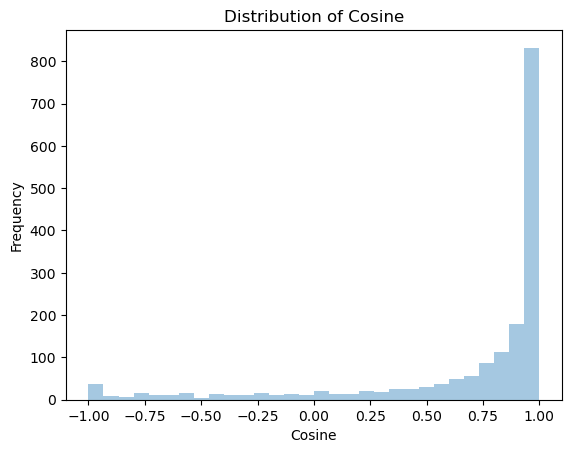

In [278]:
# Plot the distribution of 'cosine'
sns.distplot(tw1_test_tackle['cosine'], kde=False, bins=30)

# Set the title and labels
plt.title('Distribution of Cosine')
plt.xlabel('Cosine')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### **2.10: Inspecting how much data there is before each tackle/missed tackle**
The goal is to know how long speed, cosine, and alignment should be average before each tackle/missed tackle
- Should be 5 features in total

**Checking to see which tackles do not have a full second of data before them**

In [362]:
def check_indices(df):
    # Get the indices of the rows where 'event' is 'tackle'
    tackle_indices = df[df['event'] == 'tackle'].index

    # Number of frames before 'tackle' event
    X = 5

    # Initialize count
    count = 0

    # List to store the indices where 'game_play_Id' and 'nflId' are different
    different_indices = []

    for idx in tackle_indices:
        # Check if the index X indices before exists in the DataFrame
        if idx - X in df.index:
            # Check if 'game_play_Id' and 'nflId' are the same
            if df.loc[idx, 'game_play_Id'] != df.loc[idx - X, 'game_play_Id'] or df.loc[idx, 'nflId'] != df.loc[idx - X, 'nflId']:
                count += 1
                different_indices.append(idx)

    # Print the indices where 'game_play_Id' and 'nflId' are different
    print('Indices where game_play_Id and nflId are different:', different_indices)

    # Print the count
    print('Count:', count)

In [371]:
check_indices(tw1)

Indices where game_play_Id and nflId are different: []
Count: 0


**Checking to see which missed tackles do not have a full second of data before them**

In [383]:
def check_indices_mt(df):
    # Get the indices of the rows where 'event' is 'tackle'
    missed_tackle_indices = df[df['new_event'] == 'missed tackle'].index

    # Number of frames before 'tackle' event
    X = 10

    # Initialize count
    count = 0

    # List to store the indices where 'game_play_Id' and 'nflId' are different
    different_indices = []

    for idx in missed_tackle_indices:
        # Check if the index X indices before exists in the DataFrame
        if idx - X in df.index:
            # Check if 'game_play_Id' and 'nflId' are the same
            if df.loc[idx, 'game_play_Id'] != df.loc[idx - X, 'game_play_Id'] or df.loc[idx, 'nflId'] != df.loc[idx - X, 'nflId']:
                count += 1
                different_indices.append(idx)

    # Print the indices where 'game_play_Id' and 'nflId' are different
    print('Indices where game_play_Id and nflId are different:', different_indices)

    # Print the count
    print('Count:', count)

In [393]:
check_indices_mt(tw9)

Indices where game_play_Id and nflId are different: [36844, 289893, 316364, 332696, 448359, 470718]
Count: 6


### **2.11: Calculating the alignment of the defender and ball carrier's direction and orientation**

In [339]:
def calculate_alignment(df):
    """
    Updated function to calculate the alignment between orientation and direction for two sets of columns 
    in a DataFrame. The results are normalized such that:
    - 1 indicates perfect alignment
    - 0 indicates 90 degrees difference
    - -1 indicates perfect misalignment

    :param df: Pandas DataFrame with columns 'o', 'dir', 'bc_o', and 'bc_dir'.
    :return: DataFrame with two new columns: 'do_align' and 'bc_do_align'.
    """
    # Calculate the angular differences for 'do_align' and 'bc_do_align'
    df['do_align'] = df['dir'] - df['o']
    df['bc_do_align'] = df['bc_dir'] - df['bc_o']

    # Normalize the differences to the range -1 to 1 with new criteria
    df['do_align'] = df['do_align'].apply(lambda x: -abs(((x + 180) % 360) - 180) / 90 + 1)
    df['bc_do_align'] = df['bc_do_align'].apply(lambda x: -abs(((x + 180) % 360) - 180) / 90 + 1)

    return df

In [343]:
tw1 = calculate_alignment(tw1)
tw2 = calculate_alignment(tw2)
tw3 = calculate_alignment(tw3)
tw4 = calculate_alignment(tw4)
tw5 = calculate_alignment(tw5)
tw6 = calculate_alignment(tw6)
tw7 = calculate_alignment(tw7)
tw8 = calculate_alignment(tw8)
tw9 = calculate_alignment(tw9)

In [344]:
tw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154194 entries, 44 to 734209
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gameId            154194 non-null  int64  
 1   playId            154194 non-null  int64  
 2   nflId             154194 non-null  float64
 3   displayName       154194 non-null  object 
 4   frameId           154194 non-null  int64  
 5   time              154194 non-null  object 
 6   jerseyNumber      154194 non-null  float64
 7   club              154194 non-null  object 
 8   playDirection     154194 non-null  object 
 9   x                 154194 non-null  float64
 10  y                 154194 non-null  float64
 11  s                 154194 non-null  float64
 12  a                 154194 non-null  float64
 13  dis               154194 non-null  float64
 14  o                 154194 non-null  float64
 15  dir               154194 non-null  float64
 16  event             13684 

In [345]:
df_cosine_na = tw1[tw1['cosine'].isna()]

In [351]:
tw1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,game_play_Id,defensiveTeam,ballCarrierId,bcx,bcy,bc_s,bc_a,bc_dis,bc_o,bc_dir,distance_from_bc,tackler_one,tackler_two,assister_one,assister_two,missed_tackler_1,missed_tackler_2,missed_tackler_3,missed_tackler_4,missed_tackler_5,missed_tackler_6,new_event,rel_s,rel_dir,cosine,do_align,bc_do_align
44,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.200000,14.0,BUF,left,80.60,38.29,6.23,0.90,0.62,140.05,189.38,NaN,2022090800_56,LA,42489,80.60,38.29,6.23,0.90,0.62,140.05,189.38,0.0,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,12.46,-99.38,1.0,0.451889,0.451889
45,2022090800,56,42489.0,Stefon Diggs,2,2022-09-08 20:24:05.299999,14.0,BUF,left,80.48,37.68,6.24,1.27,0.62,134.22,191.08,pass_arrived,2022090800_56,LA,42489,80.48,37.68,6.24,1.27,0.62,134.22,191.08,0.0,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,12.48,-101.08,1.0,0.368222,0.368222
46,2022090800,56,42489.0,Stefon Diggs,3,2022-09-08 20:24:05.400000,14.0,BUF,left,80.34,37.09,5.98,2.48,0.60,127.16,194.40,NaN,2022090800_56,LA,42489,80.34,37.09,5.98,2.48,0.60,127.16,194.40,0.0,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,11.96,-104.40,1.0,0.252889,0.252889
47,2022090800,56,42489.0,Stefon Diggs,4,2022-09-08 20:24:05.500000,14.0,BUF,left,80.19,36.53,5.67,3.37,0.58,120.72,196.97,NaN,2022090800_56,LA,42489,80.19,36.53,5.67,3.37,0.58,120.72,196.97,0.0,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,11.34,-106.97,1.0,0.152778,0.152778
48,2022090800,56,42489.0,Stefon Diggs,5,2022-09-08 20:24:05.599999,14.0,BUF,left,80.01,36.00,5.43,3.65,0.56,118.07,199.54,NaN,2022090800_56,LA,42489,80.01,36.00,5.43,3.65,0.56,118.07,199.54,0.0,43294,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,10.86,-109.54,1.0,0.094778,0.094778


In [352]:
tw1.drop(columns= ['rel_s', 'rel_dir'], inplace=True)

In [357]:
tw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128011 entries, 50 to 599791
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gameId            128011 non-null  int64  
 1   playId            128011 non-null  int64  
 2   nflId             128011 non-null  float64
 3   displayName       128011 non-null  object 
 4   frameId           128011 non-null  int64  
 5   time              128011 non-null  object 
 6   jerseyNumber      128011 non-null  float64
 7   club              128011 non-null  object 
 8   playDirection     128011 non-null  object 
 9   x                 128011 non-null  float64
 10  y                 128011 non-null  float64
 11  s                 128011 non-null  float64
 12  a                 128011 non-null  float64
 13  dis               128011 non-null  float64
 14  o                 128011 non-null  float64
 15  dir               128011 non-null  float64
 16  event             11048 

**Checking how many players are completely still from 0.1-0.5 seconds before tackle event, and from 0.6-1.0 seconds before tackle event**

In [409]:
def check_speed(df):
    # Initialize lists to store the indices
    s_zero_indices_05 = []
    bs_s_zero_indices_05 = []
    s_zero_indices_1 = []
    bs_s_zero_indices_1 = []

    # Iterate over the DataFrame
    for i, row in df.iterrows():
        # Check if 'nflId' is equal to 'tackler_one' or 'tackler_two'
        if pd.notnull(row['tackler_one']) and pd.notnull(row['tackler_two']) and row['nflId'] in [row['tackler_one'], row['tackler_two']]:
            # Check if 'event' is 'tackle'
            if row['event'] == 'tackle':
                # Check if 's' has an average of 0 over the indices i-1:i-5
                if df.loc[i-5:i, 's'].mean() == 0:
                    s_zero_indices_05.append(i)
                # Check if 'bs_s' has an average of 0 over the indices i-1:i-5
                if df.loc[i-5:i, 'bc_s'].mean() == 0:
                    bs_s_zero_indices_05.append(i)
                # Check if 's' has an average of 0 over the indices i-6:i-10
                if df.loc[i-10:i-5, 's'].mean() == 0:
                    s_zero_indices_1.append(i)
                # Check if 'bs_s' has an average of 0 over the indices i-6:i-10
                if df.loc[i-10:i-5, 'bc_s'].mean() == 0:
                    bs_s_zero_indices_1.append(i)
        # Check if 'nflId' is equal to any of 'missed_tackler_{x}'
        elif any(pd.notnull(row[f'missed_tackler_{x}']) and row['nflId'] == row[f'missed_tackler_{x}'] for x in range(1, 7)):
            # Check if 'new_event' is 'missed tackle'
            if row['new_event'] == 'missed tackle':
                # Check if 's' has an average of 0 over the indices i-1:i-5
                if df.loc[i-5:i, 's'].mean() == 0:
                    s_zero_indices_05.append(i)
                # Check if 'bs_s' has an average of 0 over the indices i-1:i-5
                if df.loc[i-5:i, 'bc_s'].mean() == 0:
                    bs_s_zero_indices_05.append(i)
                # Check if 's' has an average of 0 over the indices i-6:i-10
                if df.loc[i-10:i-5, 's'].mean() == 0:
                    s_zero_indices_1.append(i)
                # Check if 'bs_s' has an average of 0 over the indices i-6:i-10
                if df.loc[i-10:i-5, 'bc_s'].mean() == 0:
                    bs_s_zero_indices_1.append(i)
    # Print the lists and their lengths
    print('Indices where s has an average of 0 over first half second:', s_zero_indices_05)
    print('Count:', len(s_zero_indices_05))
    print('Indices where bs_s has an average of 0 over first half second:', bs_s_zero_indices_05)
    print('Count:', len(bs_s_zero_indices_05))
    print('Indices where s has an average of 0 over second half second:', s_zero_indices_1)
    print('Count:', len(s_zero_indices_1))
    print('Indices where bs_s has an average of 0 over second half second:', bs_s_zero_indices_1)
    print('Count:', len(bs_s_zero_indices_1))
    



In [418]:
check_speed(tw9)

Indices where s has an average of 0 over first half second: []
Count: 0
Indices where bs_s has an average of 0 over first half second: []
Count: 0
Indices where s has an average of 0 over second half second: []
Count: 0
Indices where bs_s has an average of 0 over second half second: []
Count: 0


### **2.12: Merging Body Weights of Defender and Ball Carrier to Tracking Data**

In [426]:
###Function to add weight and ball carrier weight to DF
def merge_weights(df1, df2):
    # Merge 'weight' to df1 based on 'nflId'
    df1 = df1.merge(df2[['nflId', 'weight']], on='nflId', how='left')
    
    # Merge 'weight' to df1 based on 'ballCarrierId'
    df1 = df1.merge(df2[['nflId', 'weight']].rename(columns={'nflId': 'ballCarrierId'}), on='ballCarrierId', how='left')
    df1.rename(columns={'weight_x': 'weight', 'weight_y': 'bc_weight'}, inplace=True)

    return df1

In [428]:
tw1 = merge_weights(tw1, players)
tw2 = merge_weights(tw2, players)
tw3 = merge_weights(tw3, players)
tw4 = merge_weights(tw4, players)
tw5 = merge_weights(tw5, players)
tw6 = merge_weights(tw6, players)
tw7 = merge_weights(tw7, players)
tw8 = merge_weights(tw8, players)
tw9 = merge_weights(tw9, players)

### **2.13: Calculating Force for Defender and Ball Carrier**

In [432]:
###Function to calculate force for Defender and Ball Carrier
def calculate_force(df):
    # Calculate force for the defender
    df['force'] = df['weight'] * df['a']

    # Calculate force for the ball carrier
    df['bc_force'] = df['bc_weight'] * df['bc_a']

    return df

In [435]:
tw1 = calculate_force(tw1)
tw2 = calculate_force(tw2)
tw3 = calculate_force(tw3)
tw4 = calculate_force(tw4)
tw5 = calculate_force(tw5)
tw6 = calculate_force(tw6)
tw7 = calculate_force(tw7)
tw8 = calculate_force(tw8)
tw9 = calculate_force(tw9)

### **2.14: Saving Processed Tracking Data**

**Saving Processed Tracking CSVs**

In [438]:
tw1.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw1_processed.csv', index=False)
tw2.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw2_processed.csv', index=False)
tw3.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw3_processed.csv', index=False)
tw4.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw4_processed.csv', index=False)
tw5.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw5_processed.csv', index=False)
tw6.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw6_processed.csv', index=False)
tw7.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw7_processed.csv', index=False)
tw8.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw8_processed.csv', index=False)
tw9.to_csv('/Users/alexiainman/Documents/Big Data Bowl/Data/Processed/tw9_processed.csv', index=False)